<font size='6'><b>Bayesian Machine Learning</b></font>

Table of Contents
<div id="toc"></div>

# 1. Bayesian Classifier (or Bayesian Decision Theory)

Given the height $x$ of a person, decide whether the person is male ($y=1$) or female ($y=0$).


- Binary Classes: $y\in \{0,1\}$ 

$$
\begin{align*}P(y=1 \mid x) &=\frac{P(x \mid y=1)P(y=1)}{P(x)} =\frac{ \underbrace{P(x \mid y=1)}_{\text{likelihood}} \underbrace{P(y=1)}_{\text{prior}}}{\underbrace{P(x)}_{\text{marginal}}} \\
P(y=0 \mid x) &=\frac{P(x \mid y=0)P(y=0)}{P(x)}
\end{align*}$$

- Decision

$$
\begin{align*}
\text{If} \; P(y=1 \mid x) > P(y=0 \mid x),\; \text{then} \; \hat{y} = 1 \\
\text{If} \; P(y=1 \mid x) < P(y=0 \mid x),\; \text{then} \; \hat{y} = 0
\end{align*}
$$

<br>

$$\therefore  \;
\frac{P(x \mid y=0)P(y=0)}{P(x \mid y=1)P(y=1)} \quad\begin{cases}
    >1 \quad \implies \; \hat{y}=0 \\
    =1 \quad \implies \; \text{decision boundary}\\
    <1 \quad \implies \; \hat{y}=1 
\end{cases}$$


## 1.1. Equal variance and equal prior

$$
\sigma_0 = \sigma_1 \qquad \text{and} \qquad P(y=0)=P(y=1)=\frac{1}{2}$$

$$P(x) = P(x \mid y=0) P(y=0) + P(x \mid y=1)P(y=1) = \frac{1}{2}\left\{ P(x \mid y=0) + P(x \mid y=1)\right\}$$

- Decision Boundary

$$P(y=0 \mid x)=P(y=1 \mid x)$$

<br>
<img src="./image_files/01.png" width = 600>
<br>

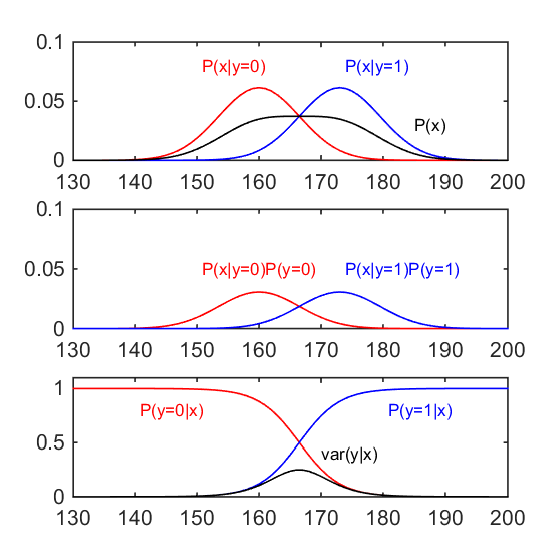

In [33]:
%plot -s 560,560
x = 130:200;
mu0 = 160;
mu1 = 173;
sigma0 = 6.5;
sigma1 = 6.5;

L1 = normpdf(x,mu0,sigma0);
L2 = normpdf(x,mu1,sigma1);

prior0 = 1/2;
prior1 = 1/2;

Px = L1*prior0 + L2*prior1;
posterior0 = (L1*prior0)./Px;
posterior1 = (L2*prior1)./Px;

var1 = posterior1 - posterior1.^2;

subplot(3,1,1),  
plot(x,L1,'r',x,L2,'b',x,Px,'k')
axis([130 200 0 0.1])
text(mu0-10,0.08,'\color{red} P(x|y=0)','fontsize',8)
text(mu1,0.08,'\color{blue} P(x|y=1)','fontsize',8)
text(185,0.03,'P(x)','fontsize',8)

subplot(3,1,2), 
plot(x,L1*prior0,'r',x,L2*prior1,'b')
axis([130 200 0 0.1])
text(mu0-10,0.05,'\color{red} P(x|y=0)P(y=0)','fontsize',8)
text(mu1,0.05,'\color{blue} P(x|y=1)P(y=1)','fontsize',8)

subplot(3,1,3),  
plot(x,posterior0,'r',x,posterior1,'b',x,var1,'k')
axis([130 200 0 1.1])
text(140,0.8,'\color{red} P(y=0|x)','fontsize',8)
text(180,0.8,'\color{blue} P(y=1|x)','fontsize',8)
text(170,0.4,'var(y|x)','fontsize',8)

## 1.2. Equal variance and _not_ equal prior

$$
\sigma_0 = \sigma_1 \qquad \text{and} \qquad P(y=0)<P(y=1)
$$

<br>
<img src="./image_files/02.png" width = 600>
<br>

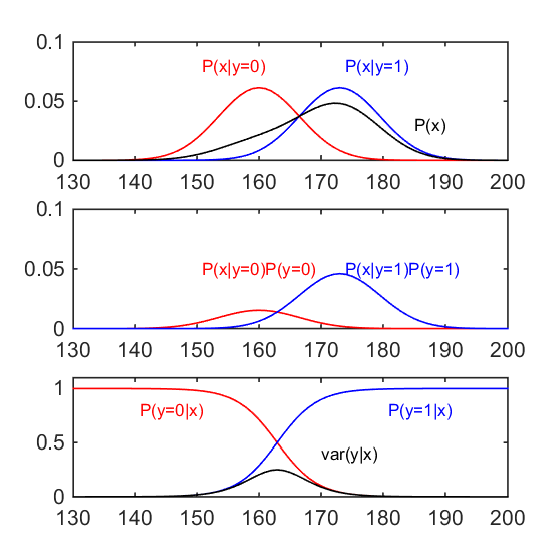

In [34]:
%plot -s 560,560
x = 130:200;
mu0 = 160;
mu1 = 173;
sigma0 = 6.5;
sigma1 = 6.5;

L1 = normpdf(x,mu0,sigma0);
L2 = normpdf(x,mu1,sigma1);

prior0 = 1/4;
prior1 = 3/4;

Px = L1*prior0 + L2*prior1;
posterior0 = (L1*prior0)./Px;
posterior1 = (L2*prior1)./Px;

var1 = posterior1 - posterior1.^2;

subplot(3,1,1),  
plot(x,L1,'r',x,L2,'b',x,Px,'k')
axis([130 200 0 0.1])
text(mu0-10,0.08,'\color{red} P(x|y=0)','fontsize',8)
text(mu1,0.08,'\color{blue} P(x|y=1)','fontsize',8)
text(185,0.03,'P(x)','fontsize',8)

subplot(3,1,2), 
plot(x,L1*prior0,'r',x,L2*prior1,'b')
axis([130 200 0 0.1])
text(mu0-10,0.05,'\color{red} P(x|y=0)P(y=0)','fontsize',8)
text(mu1,0.05,'\color{blue} P(x|y=1)P(y=1)','fontsize',8)

subplot(3,1,3),  
plot(x,posterior0,'r',x,posterior1,'b',x,var1,'k')
axis([130 200 0 1.1])
text(140,0.8,'\color{red} P(y=0|x)','fontsize',8)
text(180,0.8,'\color{blue} P(y=1|x)','fontsize',8)
text(170,0.4,'var(y|x)','fontsize',8)

## 1.3. _Not_ equal variance and equal prior

$$
\sigma_0 \ne \sigma_1 \qquad \text{and} \qquad P(y=0)=P(y=1)=\frac{1}{2}$$

<br>
<img src="./image_files/03.png" width = 600>
<br>

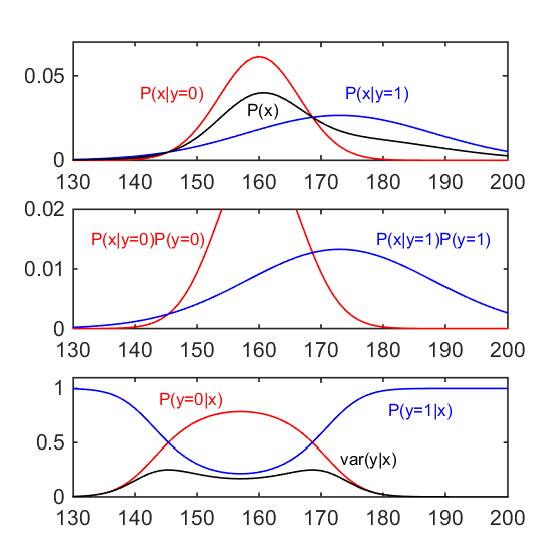

In [35]:
%plot -s 560,560
x = 130:200;
mu0 = 160;
mu1 = 173;
sigma0 = 6.5;
sigma1 = 15;

L1 = normpdf(x,mu0,sigma0);
L2 = normpdf(x,mu1,sigma1);

prior0 = 1/2;
prior1 = 1/2;

Px = L1*prior0 + L2*prior1;
posterior0 = (L1*prior0)./Px;
posterior1 = (L2*prior1)./Px;

var1 = posterior1 - posterior1.^2;

subplot(3,1,1),  
plot(x,L1,'r',x,L2,'b',x,Px,'k')
axis([130 200 0 0.07])
text(mu0-20,0.04,'\color{red} P(x|y=0)','fontsize',8)
text(mu1,0.04,'\color{blue} P(x|y=1)','fontsize',8)
text(158,0.03,'P(x)','fontsize',8)

subplot(3,1,2), 
plot(x,L1*prior0,'r',x,L2*prior1,'b')
axis([130 200 0 0.02])
text(mu0-28,0.015,'\color{red} P(x|y=0)P(y=0)','fontsize',8)
text(mu1+5,0.015,'\color{blue} P(x|y=1)P(y=1)','fontsize',8)

subplot(3,1,3),  
plot(x,posterior0,'r',x,posterior1,'b',x,var1,'k')
axis([130 200 0 1.1])
text(143,0.9,'\color{red} P(y=0|x)','fontsize',8)
text(180,0.8,'\color{blue} P(y=1|x)','fontsize',8)
text(173,0.35,'var(y|x)','fontsize',8)

__Lecture 23 in [Learning Theory](http://www.shadmehrlab.org/Courses/learningtheory.html) (Reza Shadmehr, Johns Hopkins University)__

In [36]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/3r5SlvjJptM" 
frameborder="0" allowfullscreen></iframe>

In [32]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/X1WB6IJqMjM" 
frameborder="0" allowfullscreen></iframe>

# 2. Bayesian Density Estimation

In [1]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/J5uQcuQ_fJ0" 
frameborder="0" allowfullscreen></iframe>

- Estimate a probability density function of a hidden state from multiple observations


<img src="./image_files/bayesian01.png" width = 250>
<br>

- $H$: Hypothesis, hidden state
- $D = \{d_1,d_2,\cdots,d_m\}$: data, observation, evidence

$$ P(H,D) = P(H \mid D)P(D) = P(D \mid H)P(H) $$

- Goal: $$ P(H \mid D) = \frac{P(D \mid H)P(H)}{P(D)}: \quad \text{ Bayes' Rule} $$

<br>
<img src="./image_files/bayesian02.png" width = 600>
<br>
<br>
<img src="./image_files/bayesian03.png" width = 600>
<br>
<br>
<img src="./image_files/bayesian04.png" width = 600>
<br>

In [2]:
%%html
<iframe width="420" height="315" 
src="https://www.youtube.com/embed/w1u6-_2jQJo" frameborder="0" allowfullscreen>
</iframe>

## 2.1. Combining Multiple Evidences

- Assume conditional independence (Markovian Property)


$$
\begin{align*} P(H \mid \underbrace{d_1,d_2,\cdots,d_m}_{\text{multiple evidences}}) &= \frac{P(d_1,d_2,\cdots,d_m \mid H) \; P(H)}{P(d_1,d_2,\cdots,d_m)}  \\ \\
&=\frac{P(d_1 \mid H)P(d_2 \mid H)\cdots P(d_m \mid H) \;P(H)}{P(d_1,d_2,\cdots,d_m)} \\ \\
&= \eta\prod\limits_{i=1}^m P(d_i \mid H)P(H), \qquad \eta: \text{normalizing}
\end{align*}$$

## 2.2. Recursive Bayesian Estimation

- two identities

$$ 
\begin{align*}P(a,b) &= P(a \mid b) P(b) \\
P(a,b \mid c) & = P(a \mid b,c) P(b \mid c)
\end{align*}$$

- When multiple $d_1, d_2, \cdots $

$$
\begin{align*}
P(H\mid d_1) &= \frac{P(d_1 \mid H) P(H)}{P(d_1)} = \eta_1 \, P(d_1 \mid H) \underbrace{P(H)}_{\text{prior}} \\
P(H\mid d_1 d_2) &= \frac{P(d_1 d_2\mid H) P(H)}{P(d_1 d_2)} = \frac{P(d_1 \mid H)P(d_2 \mid H) P(H)}{P(d_1 d_2)} = \eta_2 \, P(d_2 \mid H) \underbrace{P(H\mid d_1)}_{\text{acting as a prior}} \\
& \quad \vdots \\ \\
P(H \mid d_1,d_2,\cdots,d_m) &= \eta_m \,P(d_m \mid H) \underbrace{P(H \mid d_1,d_2,\cdots,d_{m-1})}_{\text{acting as a prior}} 
\end{align*}
$$

- Recursive


$$P_0(H) = P(H) \implies \; P(H \mid d_1)=P_1(H) \implies \; P(H \mid d_1 d_2) =  P_2(H) \implies \; \cdots$$


- Recursive Bayesian Estimation


<img src="./image_files/recursive.png" width = 600>

## 2.3. Example in 1D

<br>
<img src="./image_files/bayesian05.png" width = 550>

<img src="./image_files/bayesian06.png" width = 550>
<br>

Given model

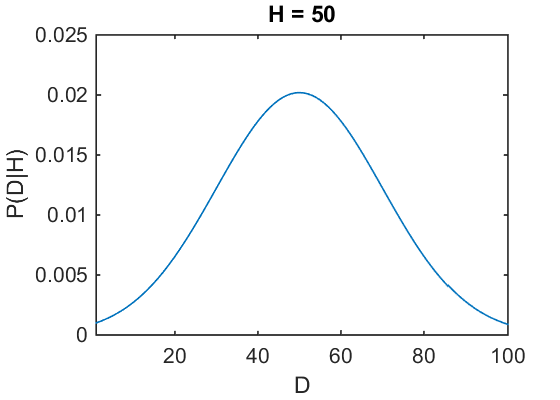

In [3]:
%plot -s 560,400

H = 50;         % if location of unknown object = 50
sigma = 20;     % assume normal dist w/ sigma = 20

n = 100;
x = 1:n;
likelihood = normpdf(x,H,sigma);
likelihood = likelihood/sum(likelihood); %normalizing

plot(x,likelihood), axis tight, ylim([0,0.025])
xlabel('D')
ylabel('P(D|H)')
title(['H = ', num2str(H)])

Likelihood

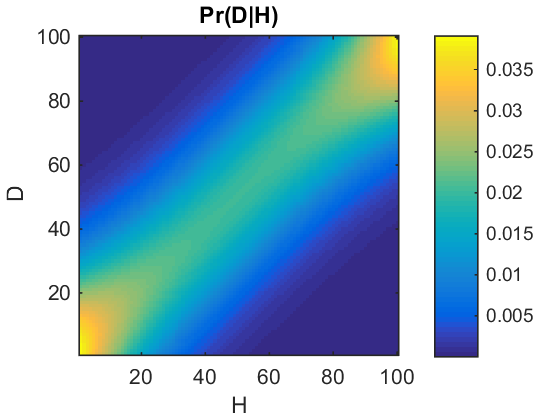

In [4]:
%plot -s 560,420
L = zeros(n,n); % likelihood

for h = 1:n    
    L(:,h) = normpdf(x,h,sigma);
    L(:,h) = L(:,h)/sum(L(:,h));
end

imagesc(L), colorbar, axis image
set(gca,'ydir','normal')
xlabel('H'),    ylabel('D'),    title('Pr(D|H)')

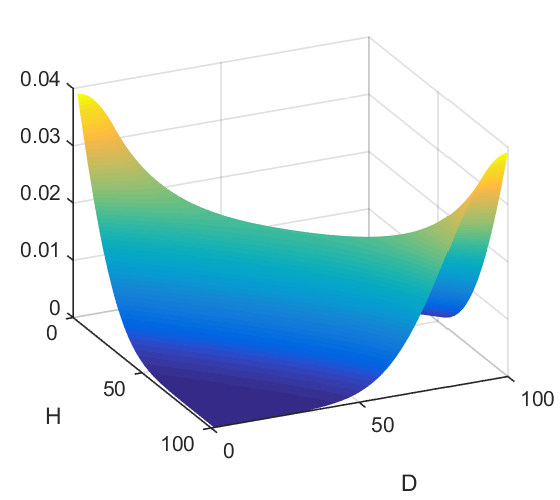

In [5]:
%plot -s 560,500
surf(x,x,L), shading interp, view(65,28)
xlabel('H')
ylabel('D')

Suppose $H = 45$

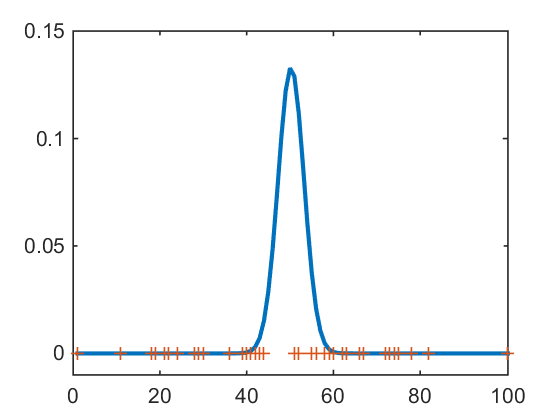

In [6]:
%plot -s 560,420
%% run it in Matlab to see animation

n = 100;
x = 1:n;

sigma = 20;
L = zeros(n,n); % likelihood

for h = 1:n    
    L(:,h) = normpdf(x,h,sigma)';
    L(:,h) = L(:,h)/sum(L(:,h));
end

%%
H = 45;

pr = ones(n,1)/n; % prior = uniform 
dh = [];

for i = 1:50
    d = round(normrnd(H,sigma));    % observation

    % make sure 1 <= d <= 100
    if d <= 0
        d = 1;
    elseif d >= 100
        d = 100;
    end
    
    dh = [dh d];
    
    plot(x,pr,'linewidth',2),   hold on
    plot(dh,zeros(size(dh)),'+'),  hold off
    ylim([-0.01 0.15])

    po = L(d,:)'.*pr;
    po = po/sum(po);    
    
    pr = po;
    pause(0.1)
end

In [7]:
mean(dh)
[~,I] = max(po)

ans =

   50.6000


I =

    51

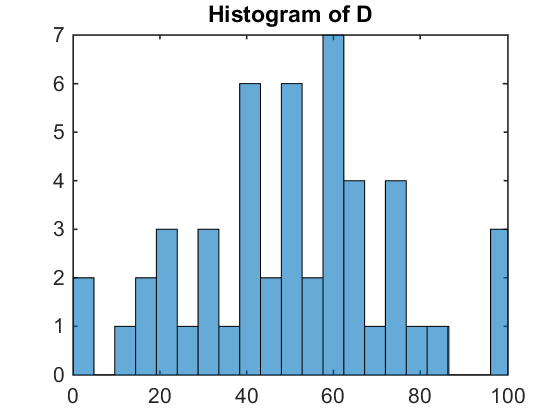

In [8]:
%plot -s 560,420
histogram(dh,21),  xlim([0,100])
title('Histogram of D')

## 2.4. Example in 2D

- [Online tutorial](http://studentdavestutorials.weebly.com/recursive-bayesian-estimation-with-matlab-code.html)

In [9]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/qsLF3KgavJk" frameborder="0" allowfullscreen>
</iframe>

In [10]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/dhsK-mRzxFw" frameborder="0" allowfullscreen>
</iframe>

__iSystems Demo__

<img src="./image_files/recurrisveBayesian_1.gif" width = 800>

In [16]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>